# Chemical_Segregation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [30]:
dfx=pd.read_csv('Logistic_X_Train.csv')
dfy=pd.read_csv('Logistic_Y_Train.csv')
x_train=dfx[['f1','f2','f3']]
x_train=x_train.values
y_train=dfy.values.reshape((-1,))
print(y_train)
print(x_train.shape,y_train.shape)

[1 1 1 ... 1 0 1]
(3000, 3) (3000,)


In [31]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [32]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

In [33]:
def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
        return err/x.shape[0] 

In [34]:
def gradient(x,y,w,b):
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
    return [grad_w/x.shape[0],grad_b/x.shape[0]]

In [35]:
def predict(x,w,b):    
    y_pred = []
    for i in range(x.shape[0]):
        confidence=hypothesis(x[i],w,b)
        if confidence<0.5:
            p=0
        else:
            p=1
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    return y_pred

In [36]:
def gradientAscent(x,y,lrate=0.1):
    err_list=[]
    w=np.random.random((x.shape[1],))
    b=np.random.random()
    itr=0
    max_itr=200
    while(itr<=max_itr):
        [grad_w,grad_b]=gradient(x,y,w,b)
        e=error(x,y,w,b)
        w+=lrate*grad_w
        b+=lrate*grad_b
        err_list.append(e)
        itr+=1
    return w,b,err_list
    

In [37]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [38]:
w,b,err_list=gradientAscent(x_train,y_train)

In [39]:
print(err_list)

[-0.00044638157262522196, -0.00041319417696719895, -0.00038278786738088, -0.0003550366280074268, -0.00032979423305834645, -0.0003068997252791853, -0.0002861830832723726, -0.00026747067755838696, -0.00025059010634040027, -0.0002353740319126082, -0.00022166276073541877, -0.0002093055722598185, -0.00019816115746403406, -0.00018809777023662898, -0.0001789935853192535, -0.000170737331259077, -0.00016322888526885992, -0.0001563794699787489, -0.00015011130848548303, -0.00014435682388057135, -0.0001390575727018132, -0.00013416309230435605, -0.00012962978549793902, -0.00012541990842512696, -0.00012150068671997477, -0.00011784356102054925, -0.00011442355111769336, -0.00011121872355886856, -0.00010820974695124666, -0.00010537952044024516, -0.000102712862739146, -0.0001001962510821778, -9.781760131270108e-05, -9.556608190870534e-05, -9.343195607733146e-05, -9.140644714048333e-05, -8.94816233184774e-05, -8.765029873308099e-05, -8.590594802692821e-05, -8.424263246028297e-05, -8.265493572070037e-05, 

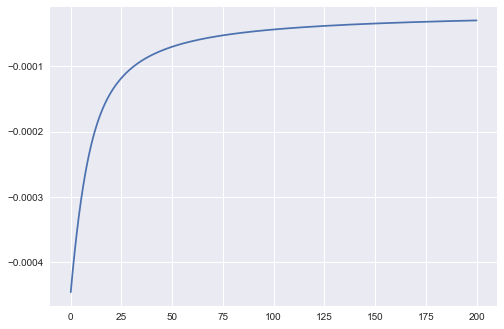

In [40]:
plt.plot(err_list)

In [41]:
x_test=pd.read_csv('Logistic_X_Test.csv')
x_test=x_test[['f1','f2','f3']].values
y_pred=predict(x_test,w,b)

In [42]:
print(y_pred)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 

IndexError: too many indices for array

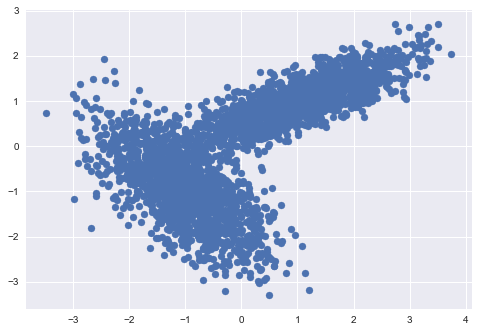

In [28]:
plt.figure(0)

plt.scatter(x_train[:,0],x_train[:,2])
plt.scatter(y_train[:,0],y_train[:,0],c='red',marker="^")
plt.xlim(-1,2)
plt.ylim(0,1)

x = np.linspace(-2,2,4)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='brown')

plt.legend()
plt.show()